c:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 7/7 [00:16<00:00,  2.36s/it]


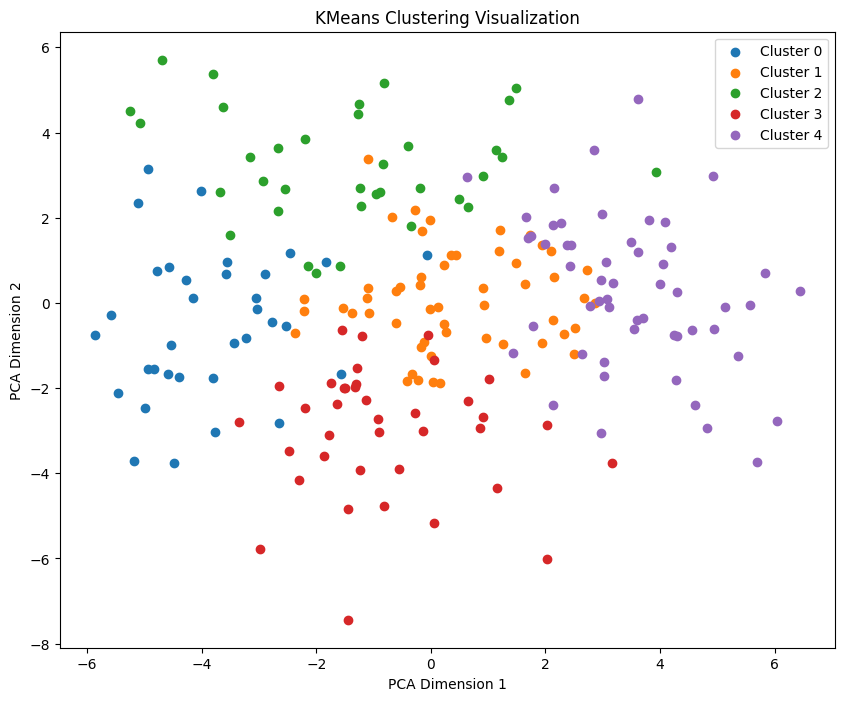

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("CrowledData_4.csv")
grouped_reviews = df.groupby("카페이름")["review"].apply(lambda x: " ".join(x)).reset_index()
grouped_reviews.columns = ["카페이름", "통합리뷰"]

# 임베딩 생성
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')
embeddings = model.encode(grouped_reviews["통합리뷰"].tolist(), show_progress_bar=True)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
grouped_reviews["cluster"] = kmeans.fit_predict(embeddings)

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(10, 8))
for cluster in range(5):
    cluster_points = reduced_embeddings[grouped_reviews["cluster"] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

df = pd.read_csv("CrowledData_4.csv")
grouped_reviews = df.groupby("카페이름")["review"].apply(lambda x: " ".join(x)).reset_index()
grouped_reviews.columns = ["카페이름", "통합리뷰"]


model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')
embeddings = model.encode(grouped_reviews["통합리뷰"].tolist(), show_progress_bar=True)



kmeans = KMeans(n_clusters=5, random_state=42)
grouped_reviews["cluster"] = kmeans.fit_predict(embeddings)

for i in range(5):
    print(f"\n[클러스터 {i}]")
    print(grouped_reviews[grouped_reviews["cluster"] == i]["카페이름"].tolist())


c:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\santa\.cache\huggingface\hub\models--snunlp--KR-SBERT-V40K-klueNLI-augSTS. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Batches: 100%|██████████| 7/7 [00:18<00:00,  2.63s/it]



[클러스터 0]
['MouseRabbit카페', '나나케이크케이크전문', '나폴레옹과자점 롯데백화점 건대스타시티점베이커리', '디저트39 건대점', '디저트르모어 룸원카이막카페,디저트', '띵똥와플 건국대점와플', '레스트인무드', '려니크케이크전문', '릴리베이커리', '배스킨라빈스 건대역점', '보라롱베이크샵베이커리', '블리스테이블 스타시티몰점', '비엔나227 건대스타시티직영점', '빙동댕 프리미엄 빙수카페 건대점빙수', '설빙 건대지점빙수', '세이케이크', '쏘스윗 건대', '아이오쓰리 성수사거리점카페,디저트', '에이콥베이커리 롯데백화점 건대스타시티점', '열매제과점베이커리', '오버더레인보우', '와플대학 구의 캠퍼스', '요거트아이스크림의정석 건대점', '요거트월드 건대점', '웨이빙 젤라또', '은비스브레드 건국대점베이커리', '일팔공일오베이커리', '초초하우스베이커리', "츄로' S Coffee&lce cream", '카페 그자체 베이커리베이커리', '커피나무 건대입구역점카페', '컴포즈커피 세종대학교점카페', '케익다방 건대점', '특별한 호두와플']

[클러스터 1]
['TWG Tea 성수낙낙점', '고망고 건대점', '골든라이언카페,디저트', '공차 자양점차', '도쿄빙수 건대점빙수', '뚜레쥬르 건국대병원점', '러프러프', '레스티오 동물생명대점카페', '로스터리 엔오알엠카페,디저트', '로이베이커리카페베이커리', '리셋커피 아일랜드', '메가MGC커피 건대스타점카페', '메가MGC커피 건대입구역점카페', '메가MGC커피 건대화양제일시장점카페', '메가MGC커피 화양사거리점카페', '메종드쁘띠푸르 커먼그라운드점베이커리', '모츠커피카페', '바나프레소 건대역점바나프레소', '베이글카페 화양점베이글', '베트남쌍둥이커피 건대본점카페,디저트', '벨렘351 건대점카페,디저트', '빽다방 광진화양삼거리점테이크아웃커피', '성북당 십원빵 건대스타시티점', '수완카페앤베이커리카페,디저트', '스타벅스 건대스타시티점', '스타벅스 자양이마트

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# 데이터 로드
df = pd.read_csv("CrowledData_4.csv")
grouped_reviews = df.groupby("카페이름")["review"].apply(lambda x: " ".join(x)).reset_index()
grouped_reviews.columns = ["카페이름", "통합리뷰"]

# 임베딩 생성
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')
embeddings = model.encode(grouped_reviews["통합리뷰"].tolist(), show_progress_bar=True)

# KMeans 클러스터링
n_clusters = 5  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
grouped_reviews["cluster"] = kmeans.fit_predict(embeddings)

# 클러스터별 리뷰 확인
for i in range(n_clusters):
    print(f"\n[클러스터 {i}]")
    cluster_reviews = grouped_reviews[grouped_reviews["cluster"] == i]["통합리뷰"].tolist()
    for review in cluster_reviews[:5]:  # 각 클러스터에서 최대 5개의 리뷰 출력
        print(f"- {review}")

FileNotFoundError: [Errno 2] No such file or directory: 'CrowledData_4.csv'